# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

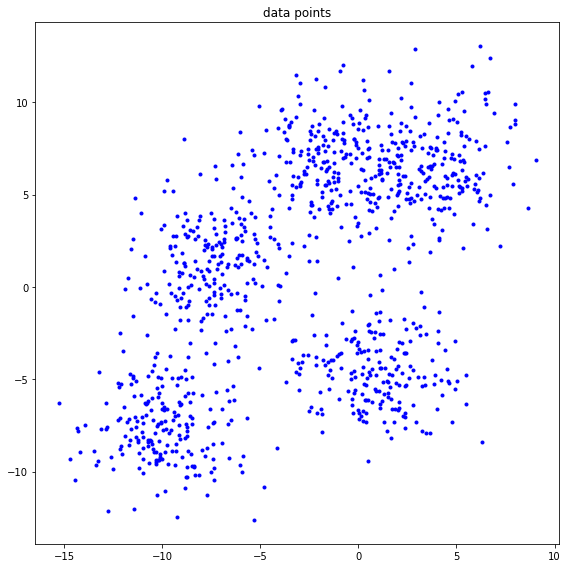

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):
    
    diff_2 = (feature - np.tile(center,(len(feature),1)))**2
    distance = np.sqrt(diff_2[:,0] + diff_2[:,1])
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [5]:
def compute_centroid(feature, label_feature, value_label):
    x_values = []
    y_values = []
    
    for i in range(number_data):
        if label_feature[i] == value_label:
            x_values.append(feature[i,0])
            y_values.append(feature[i,1])
            
    center_x = 0 if len(x_values)== 0 else np.mean(np.asarray(x_values))
        
    center_y = 0 if len(y_values)== 0 else np.mean(np.asarray(y_values))
    
    centroid = np.array([center_x, center_y]) # 1x2
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [6]:
def compute_label(distance):
    
    #distance -> (n,k)
    index_list = []
    for i in range(len(distance)):
        k = distance[i].argmin()
        index_list.append(k)
    index_label_feature = np.asarray(index_list)
    
    return index_label_feature


In [7]:
def compute_loss(feature, label, number_cluster, centroid):
    temp = 0
    data = np.c_[feature,label]
    for k in range(number_cluster):
        temp += sum(compute_distance(data[data[:,2]==k][:,:2], centroid[k]))
    temp /= number_data
    return temp

In [8]:
# assign the number of clusters and iterations
number_cluster      = 5 #k
number_iteration    = 50 #max_iter

In [108]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature)) 
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

label_feature = np.random.randint(0, number_cluster, size=number_data)
label_cluster = number_cluster
for i in range(number_iteration):
    for k in range(number_cluster):
        # k번 클러스터의 좌표 구하기
        centroid[k] = compute_centroid(feature, label_feature, k)
        # 1000개의 데이터에 대해 그 클러스터와의 거리 계산
        distance[:,k] = compute_distance(feature, centroid[k])
    # 1000xk의 거리 행렬이 구해짐
    label_feature = compute_label(distance)
    loss = compute_loss(feature, label_feature, number_cluster, centroid)
    #print(centroid)
    centroid_iteration[i] = centroid
    loss_iteration[i] = loss
    print('[%d] loss : %.5f' % (i, loss))

[0] loss : 7.20208
[1] loss : 3.61849
[2] loss : 2.77029
[3] loss : 2.64783
[4] loss : 2.55650
[5] loss : 2.50807
[6] loss : 2.48166
[7] loss : 2.46791
[8] loss : 2.46470
[9] loss : 2.46339
[10] loss : 2.46346
[11] loss : 2.46349
[12] loss : 2.46352
[13] loss : 2.46379
[14] loss : 2.46405
[15] loss : 2.46405
[16] loss : 2.46405
[17] loss : 2.46405
[18] loss : 2.46405
[19] loss : 2.46405
[20] loss : 2.46405
[21] loss : 2.46405
[22] loss : 2.46405
[23] loss : 2.46405
[24] loss : 2.46405
[25] loss : 2.46405
[26] loss : 2.46405
[27] loss : 2.46405
[28] loss : 2.46405
[29] loss : 2.46405
[30] loss : 2.46405
[31] loss : 2.46405
[32] loss : 2.46405
[33] loss : 2.46405
[34] loss : 2.46405
[35] loss : 2.46405
[36] loss : 2.46405
[37] loss : 2.46405
[38] loss : 2.46405
[39] loss : 2.46405
[40] loss : 2.46405
[41] loss : 2.46405
[42] loss : 2.46405
[43] loss : 2.46405
[44] loss : 2.46405
[45] loss : 2.46405
[46] loss : 2.46405
[47] loss : 2.46405
[48] loss : 2.46405
[49] loss : 2.46405


## plot the results

In [13]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(x, y, '.', color = 'blue')
    
    plt.tight_layout()
    plt.show()

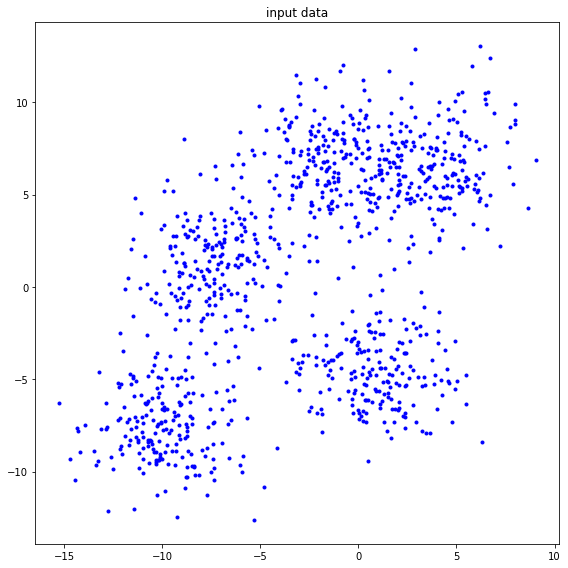

In [14]:
plot_data(feature)

In [15]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    x = np.arange(0, number_iteration)
    y = loss_iteration
    
    plt.plot(x, y, color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

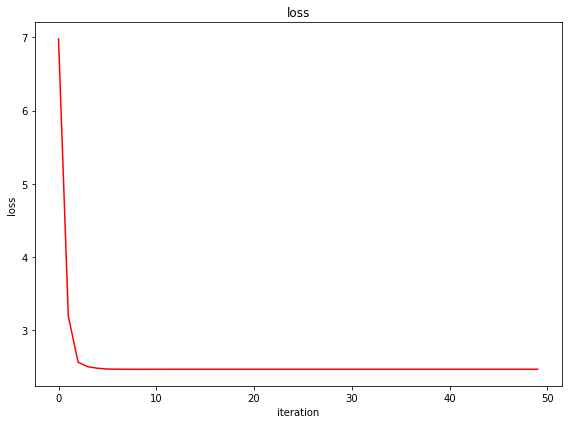

In [20]:
plot_loss_curve(loss_iteration)

In [103]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    # centroid 경로    
    for i in range(len(centroid_iteration[0,:])):
        x = centroid_iteration[:,i][:,0]
        y = centroid_iteration[:,i][:,1]
        
        rgb = np.random.rand(3)
        plt.plot(x, y, color = rgb, label = 'cluster=%d' %i)
        
    # initial centroid
    x = centroid_iteration[0][:,0]
    y = centroid_iteration[0][:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # final centroid
    x = centroid_iteration[len(centroid_iteration)-1][:,0]
    y = centroid_iteration[len(centroid_iteration)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    
    
    plt.legend()
    plt.tight_layout()
    plt.show()

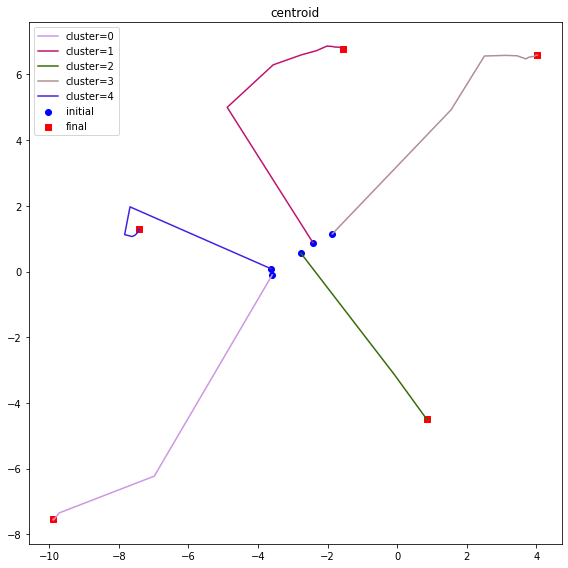

In [104]:
plot_centroid(centroid_iteration)

In [238]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    
    data = np.c_[feature,label_feature]
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5,label_cluster + 0.5, 1), cmap.N)
    plot = plt.scatter(data[:,0:2][:,0],
                data[:,0:2][:,1],
                c = label_feature, norm = norm, s = 20, edgecolor = 'none')

    cbar = plt.colorbar(plot, ticks = np.arange(0, label_cluster))
    
    plt.tight_layout()
    plt.show()


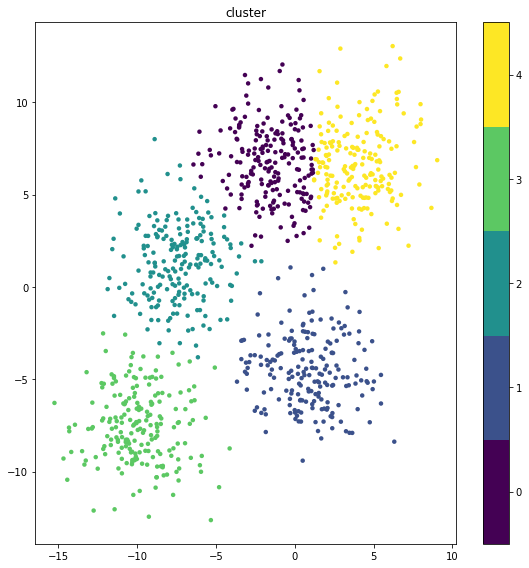

In [239]:
plot_cluster(feature, label_feature, label_cluster)

***

# results

***

1. plot the input data

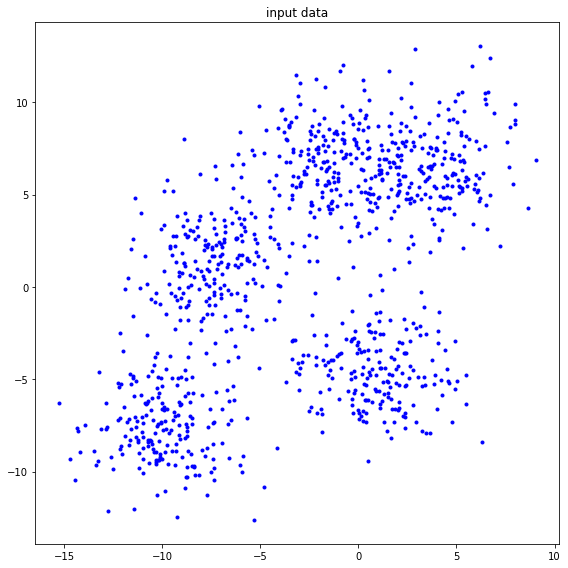

In [12]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

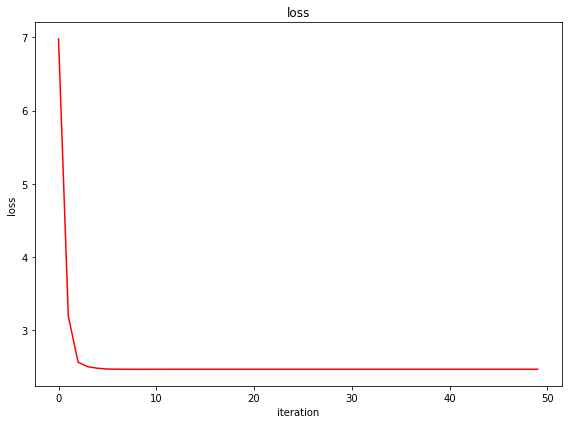

In [17]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

In [ ]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

In [ ]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

In [ ]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

In [ ]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

In [ ]:
plot_cluster(feature, label_feature, label_cluster)

***